Task 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv("Dataset .csv")
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [3]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [4]:
y = df["Aggregate rating"]
y

0       4.8
1       4.5
2       4.4
3       4.9
4       4.8
       ... 
9546    4.1
9547    4.2
9548    3.7
9549    4.0
9550    4.0
Name: Aggregate rating, Length: 9551, dtype: float64

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [6]:
x=df.drop(columns=['Restaurant ID', 'Restaurant Name', 'Country Code','Address','Locality Verbose', 'Longitude', 'Latitude','Aggregate rating', 'Rating color'],axis=1)
x

,City,Locality,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Rating text,Votes
0,Makati City,"Century City Mall, Poblacion, Makati City","French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,Excellent,314
1,Makati City,"Little Tokyo, Legaspi Village, Makati City",Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,Excellent,591
2,Mandaluyong City,"Edsa Shangri-La, Ortigas, Mandaluyong City","Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,Very Good,270
3,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City","Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,Excellent,365
4,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City","Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...
9546,��stanbul,Karak�_y,Turkish,80,Turkish Lira(TL),No,No,No,No,3,Very Good,788
9547,��stanbul,Ko��uyolu,"World Cuisine, Patisserie, Cafe",105,Turkish Lira(TL),No,No,No,No,3,Very Good,1034
9548,��stanbul,Kuru�_e��me,"Italian, World Cuisine",170,Turkish Lira(TL),No,No,No,No,4,Good,661
9549,��stanbul,Kuru�_e��me,Restaurant Cafe,120,Turkish Lira(TL),No,No,No,No,4,Very Good,901


In [7]:
le = LabelEncoder()

In [8]:
x.drop(columns=['City','Locality'],axis=1,inplace=True)

In [9]:
x["Cuisines"] = le.fit_transform(x['Cuisines'])

In [10]:
x["Currency"]=le.fit_transform(x["Currency"])
x["Has Table booking"]=le.fit_transform(x["Has Table booking"])
x["Has Online delivery"]=le.fit_transform(x["Has Online delivery"])
x["Is delivering now"]=le.fit_transform(x["Is delivering now"])
x["Switch to order menu"]=le.fit_transform(x["Switch to order menu"])
x["Rating text"]=le.fit_transform(x["Rating text"])

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
sc = StandardScaler()
lr = LinearRegression()

In [13]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [14]:
fitting = lr.fit(x_train,y_train)

In [15]:
y_pred = lr.predict(x_test)

In [16]:
from sklearn.tree import DecisionTreeRegressor

In [17]:
dt = DecisionTreeRegressor()

In [18]:
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [19]:
prediction_tree = dt.predict(x_test)

In [20]:
prediction_tree

array([3.2, 4.7, 3.6, ..., 3.3, 3.9, 4.1])

In [21]:
from sklearn.metrics import confusion_matrix

In [22]:
prediction_tree = list(prediction_tree)
y_testing = list(y_test)

In [23]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [24]:
error = mean_absolute_error(y_testing,prediction_tree)
error2 = mean_squared_error(y_testing,prediction_tree)

In [25]:
from sklearn.ensemble import RandomForestRegressor

In [26]:
rf = RandomForestRegressor()

In [27]:
rf.fit(x_train,y_train)

RandomForestRegressor()

In [28]:
rf_pred = rf.predict(x_test)

In [30]:
error_rf = mean_squared_error(y_testing,rf_pred)
error_rf

0.034475514812092725

TASK 2

<Figure size 1000x600 with 0 Axes>

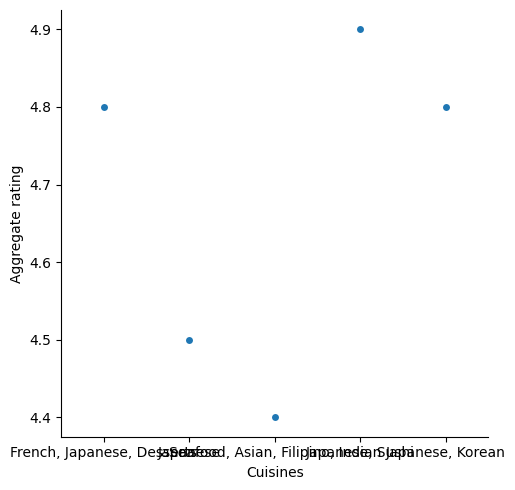

In [37]:
plt.figure(figsize=(10,6))
sns.catplot(x=df['Cuisines'].head(5),y=df['Aggregate rating'].head(5),data=df,kind='swarm')
plt.show()

In [38]:
sorted_df = df.sort_values(by="Aggregate rating",ascending=False)
sorted_df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
1381,18384115,Caterspoint,1,Gurgaon,"S-27/11, DLF Phase 3, Gurgaon",DLF Phase 3,"DLF Phase 3, Gurgaon",77.103974,28.487264,"Mexican, American, Healthy Food",...,Indian Rupees(Rs.),No,Yes,No,No,2,4.9,Dark Green,Excellent,223
589,18269368,AB's Absolute Barbecues,214,Dubai,"Mezzanaine Floor, Centurion Star Tower, Deira ...",Deira City Centre Area,"Deira City Centre Area, Dubai",55.328740,25.254105,"Continental, Indian",...,Emirati Diram(AED),Yes,No,No,No,3,4.9,Dark Green,Excellent,641
374,17580142,McGuire's Irish Pub & Brewery,216,Pensacola,"600 E Gregory Street, Pensacola, FL 32502",Pensacola,"Pensacola, Pensacola",-87.202700,30.417900,"Burger, Bar Food, Steak",...,Dollar($),No,No,No,No,3,4.9,Dark Green,Excellent,2238
9303,18217279,Miann,148,Auckland,"57 Fort Street, Auckland Auckland CBD",Fort Street,"Fort Street, Auckland",174.768986,-36.846050,Desserts,...,NewZealand($),No,No,No,No,1,4.9,Dark Green,Excellent,281
9299,7001086,Milse,148,Auckland,"The Pavilions, 27 Tyler Street, Britomart, Auc...",Britomart,"Britomart, Auckland",174.768690,-36.844188,Desserts,...,NewZealand($),No,No,No,No,3,4.9,Dark Green,Excellent,754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4034,18481278,Mirch Masala Restaurant,1,New Delhi,"Shop 1, South Avenue Market, India Gate, New D...",India Gate,"India Gate, New Delhi",77.198163,28.608673,North Indian,...,Indian Rupees(Rs.),No,No,No,No,1,0.0,White,Not rated,0
4033,18475283,Kashmiri Hills Wazwan,1,New Delhi,"Kasmir House, India Gate, New Delhi",India Gate,"India Gate, New Delhi",0.000000,0.000000,Kashmiri,...,Indian Rupees(Rs.),No,No,No,No,1,0.0,White,Not rated,1
4029,18425152,New Classic Kitchen,1,New Delhi,"Shop 35, Laxmi Bai Nagar Market, INA, New Delhi",INA,"INA, New Delhi",77.209572,28.578039,"Chinese, Fast Food",...,Indian Rupees(Rs.),No,No,No,No,1,0.0,White,Not rated,0
4025,18481317,Frugurpop- ibis New Delhi,1,New Delhi,"ibis New Delhi, Asset 9, Hospitality District,...","ibis New Delhi, Aerocity","ibis New Delhi, Aerocity, New Delhi",0.000000,0.000000,"Ice Cream, Desserts",...,Indian Rupees(Rs.),No,No,No,No,1,0.0,White,Not rated,0


In [39]:
votes_cuisine = {}
for item in df['Cuisines'].unique():
    votes_cuisine[item]=df['Votes'][df['Cuisines']==item].sum()

In [40]:
votes_cuisine = dict(sorted(votes_cuisine.items(),key=lambda item:item[1],reverse=True))

In [41]:
print("The most popular cuisines based on votes are : ")
print(votes_cuisine)

The most popular cuisines based on votes are : 
{'North Indian, Mughlai': 53747, 'North Indian': 46241, 'North Indian, Chinese': 42012, 'Cafe': 30657, 'Chinese': 21925, 'North Indian, Mughlai, Chinese': 20115, 'Fast Food': 17852, 'South Indian': 16433, 'Mughlai, North Indian': 15275, 'Italian': 14799, 'European, Mediterranean, North Indian': 12541, 'Modern Indian': 12355, 'Chinese, Thai': 12354, 'Pizza': 11537, 'Continental, American, Asian, North Indian': 11404, 'Italian, American, Pizza': 10934, 'Italian, Continental, European, Cafe': 10853, 'North Indian, Continental': 10760, 'North Indian, Chinese, Italian, Continental': 10744, 'Pizza, Fast Food': 9953, 'Street Food': 9782, 'American, Burger, Cafe': 9667, 'Bakery, Desserts, Fast Food': 8775, 'Continental, North Indian': 8463, 'Bakery, Desserts': 8361, 'North Indian, Chinese, Mughlai': 8195, 'Burger, Fast Food': 8150, 'Chinese, North Indian': 8121, 'American': 7802, 'North Indian, European, Mediterranean': 7261, 'Mexican': 7193, 'Fa

In [42]:
rating_cuisine = {}
for item in df['Cuisines'].unique():
    rating_cuisine[item]=df['Aggregate rating'][df['Cuisines']==item].mean()

In [43]:
rating_cuisine = dict(sorted(rating_cuisine.items(),key=lambda item:item[1],reverse=True))

In [44]:
rating_cuisine

{'European, Asian, Indian': 4.9,
 'American, Caribbean, Seafood': 4.9,
 'BBQ, Breakfast, Southern': 4.9,
 'American, Coffee and Tea': 4.9,
 'American, Sandwich, Tea': 4.9,
 'American, BBQ, Sandwich': 4.9,
 'Burger, Bar Food, Steak': 4.9,
 'Hawaiian, Seafood': 4.9,
 'Italian, Deli': 4.9,
 'European, German': 4.9,
 'Continental, Indian': 4.9,
 'Mexican, American, Healthy Food': 4.9,
 'Italian, Bakery, Continental': 4.9,
 'Mughlai, Lucknowi': 4.9,
 'Filipino, Mexican': 4.85,
 'French, Japanese, Desserts': 4.8,
 'Beverages, International': 4.8,
 'International, Italian, Southern': 4.8,
 'Indian, Continental': 4.8,
 'Italian, American, Pizza': 4.8,
 'European, Mediterranean, North Indian': 4.8,
 'Continental, Middle Eastern, Asian': 4.8,
 'Indian, North Indian': 4.733333333333333,
 'Seafood, American, Mediterranean, Japanese': 4.7,
 'American, Sandwich, Salad': 4.7,
 'Cajun': 4.7,
 'Greek': 4.7,
 'American, Desserts, Steak': 4.7,
 'Desserts, Bar Food': 4.7,
 'Continental, American, Italian,

Task 3

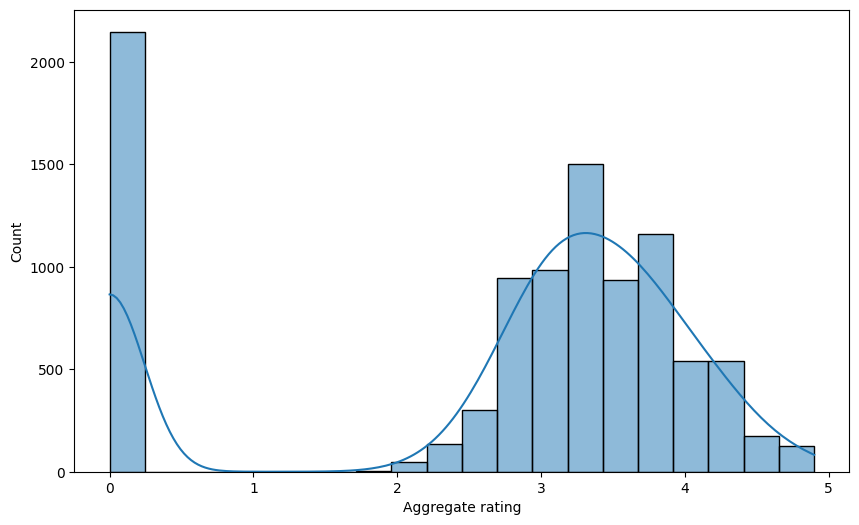

In [45]:
plt.figure(figsize=(10,6))
sns.histplot(x='Aggregate rating',data=df,bins=20,kde=True)
plt.show()

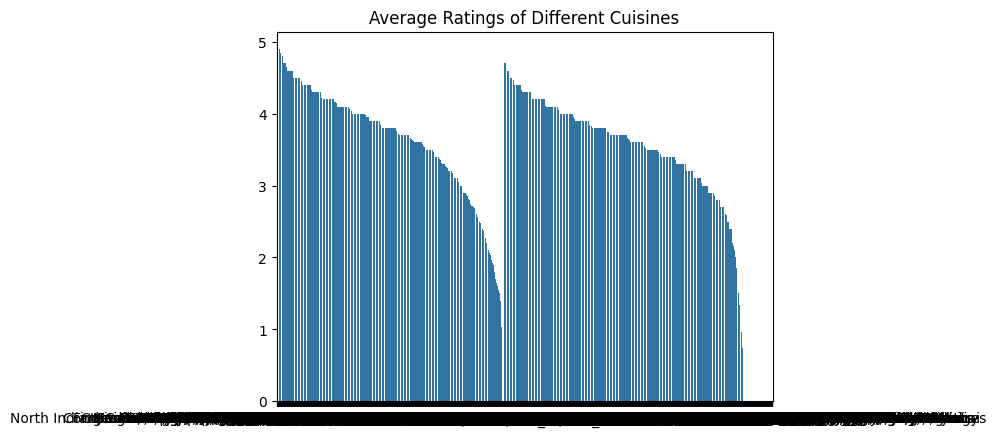

In [50]:
sns.barplot(x=rating_cuisine.keys(),y=rating_cuisine.values())
plt.title("Average Ratings of Different Cuisines")
plt.show()


In [83]:
from scipy import stats
from itertools import combinations

In [96]:
corr = {}
columns1 = ['Average Cost for two','Price range','Votes']
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [97]:
for item in columns1:
    corr[item]=stats.pearsonr(df[item],df['Aggregate rating'])[0]

In [101]:
for x in corr:
    print("Correlation of {} with Aggregate rating is :".format(x),corr[x])

Correlation of Average Cost for two with Aggregate rating is : 0.051792023949734964
Correlation of Price range with Aggregate rating is : 0.4379441493018534
Correlation of Votes with Aggregate rating is : 0.31369058419541324


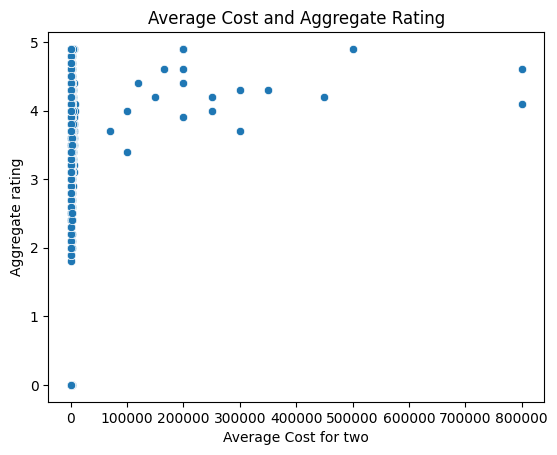

In [107]:
sns.scatterplot(x=df['Average Cost for two'],y=df['Aggregate rating'])
plt.title("Average Cost and Aggregate Rating")
plt.show()